In [1]:
import pandas as pd
from prepare import Prepare
from split_get_scale import SplitGetScale
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

zillow = Prepare().wrangle_zillow()
sgs = SplitGetScale()

/Users/rajaramgautam/codeup-data-science/zillow_clustering/prepare.py:11: DtypeWarning: Columns (63) have mixed types.Specify dtype option on import or set low_memory=False.
  df = Acquire().get_zillow_data()


In [2]:
train, validate, test = sgs.split(zillow)
(X_train, y_train), (X_validate, y_validate), (X_test, y_test) = sgs.get_Xy(train, validate, test)

In [3]:
train.head()

,parcel_id,bathroom_count,bedroom_count,home_size_square_feet,fips,latitude,longitude,lot_size_square_feet,raw_census_tract_and_block,region_id_city,...,year_built,structure_tax_value_price,tax_value_dollar_count,assessment_year,land_tax_value_price,tax_amount,census_tract_and_block,log_error,transaction_date,county
13527,11770180,1.0,2,941.0,6037,34012117.0,-118247150.0,6338.0,6.037228e+07,12447,...,1909,32430.0,72079.0,2016,39649.0,1025.09,6.037228e+13,-0.091213,2017-03-01,Los Angeles
52447,10884378,3.0,3,1560.0,6037,34203300.0,-118430000.0,7313.0,6.037127e+07,12447,...,2007,166541.0,363890.0,2016,197349.0,4473.98,6.037127e+13,-0.031320,2017-06-30,Los Angeles
2559,11749839,1.0,5,2986.0,6037,34048146.0,-118311705.0,12490.0,6.037213e+07,12447,...,1921,43056.0,78654.0,2016,35598.0,1193.71,6.037213e+13,0.059301,2017-01-12,Los Angeles
33056,10906993,2.0,1,1271.0,6037,34151000.0,-118406000.0,19158.0,6.037143e+07,12447,...,1978,151657.0,469812.0,2016,318155.0,5630.53,6.037143e+13,-0.021502,2017-05-04,Los Angeles
63509,10903027,3.0,3,2043.0,6037,34160988.0,-118412064.0,5001.0,6.037125e+07,12447,...,1962,191127.0,312927.0,2016,121800.0,3887.88,6.037125e+13,0.048015,2017-08-03,Los Angeles


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47272 entries, 13527 to 53303
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   parcel_id                   47272 non-null  int64         
 1   bathroom_count              47272 non-null  float64       
 2   bedroom_count               47272 non-null  int64         
 3   home_size_square_feet       47272 non-null  float64       
 4   fips                        47272 non-null  int64         
 5   latitude                    47272 non-null  float64       
 6   longitude                   47272 non-null  float64       
 7   lot_size_square_feet        47272 non-null  float64       
 8   raw_census_tract_and_block  47272 non-null  float64       
 9   region_id_city              47272 non-null  int64         
 10  region_id_county            47272 non-null  int64         
 11  region_id_zip               47272 non-null  int64 

In [7]:
from sklearn.preprocessing import MinMaxScaler


# get the list of the columns to scale
cols = ['bathroom_count', 'bedroom_count','home_size_square_feet', 'lot_size_square_feet', 'structure_tax_value_price', 'tax_value_dollar_count',
                'land_tax_value_price', 'tax_amount', 'log_error']  


# create the scaler object
scaler = MinMaxScaler()




# .copy() makes a proper copy
# this is an alternative to wrapping the scaled numpy array in a pd.Dataframe()
train_scaled = train.copy()
validate_scaled = validate.copy()
test_scaled = test.copy()

# apply our scaler (fit only on train!)
train_scaled[cols] = scaler.fit_transform(train[cols])
validate_scaled[cols] = scaler.transform(validate[cols])
test_scaled[cols] = scaler.transform(test[cols])

# train_scaled = train_scaled.drop(columns=column)
# validate_scaled = validate_scaled.drop(columns=column)
# test_scaled = test_scaled.drop(columns=column)

In [15]:
test_scaled.head()

,parcel_id,bathroom_count,bedroom_count,home_size_square_feet,fips,latitude,longitude,lot_size_square_feet,raw_census_tract_and_block,region_id_city,...,year_built,structure_tax_value_price,tax_value_dollar_count,assessment_year,land_tax_value_price,tax_amount,census_tract_and_block,log_error,transaction_date,county
53988,12890932,0.125,0.250,0.146082,6037,34068177.0,-117766814.0,0.001517,6.037402e+07,20008,...,1952,0.017391,0.012181,2016,0.004538,0.016309,6.037402e+13,0.563224,2017-07-05,Los Angeles
46376,10859410,0.125,0.125,0.126029,6037,34144673.0,-118432779.0,0.000889,6.037141e+07,12447,...,1950,0.060269,0.104259,2016,0.086490,0.102512,6.037141e+13,0.545603,2017-06-14,Los Angeles
29651,12525536,0.250,0.125,0.120850,6037,33759601.0,-118115692.0,0.140395,6.037578e+07,46298,...,1974,0.058627,0.084030,2016,0.062815,0.082191,6.037578e+13,0.568808,2017-04-25,Los Angeles
51043,12607314,0.250,0.375,0.315538,6037,33819600.0,-118352270.0,0.001073,6.037651e+07,54722,...,1977,0.092453,0.073728,2016,0.025496,0.070989,6.037651e+13,0.548206,2017-06-27,Los Angeles
59852,12326348,0.125,0.250,0.128287,6037,33916307.0,-118165377.0,0.000827,6.037536e+07,47762,...,1941,0.021096,0.077705,2016,0.082394,0.078951,6.037536e+13,0.566108,2017-07-24,Los Angeles


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47272 entries, 13527 to 53303
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   parcel_id                   47272 non-null  int64         
 1   bathroom_count              47272 non-null  float64       
 2   bedroom_count               47272 non-null  int64         
 3   home_size_square_feet       47272 non-null  float64       
 4   fips                        47272 non-null  int64         
 5   latitude                    47272 non-null  float64       
 6   longitude                   47272 non-null  float64       
 7   lot_size_square_feet        47272 non-null  float64       
 8   raw_census_tract_and_block  47272 non-null  float64       
 9   region_id_city              47272 non-null  int64         
 10  region_id_county            47272 non-null  int64         
 11  region_id_zip               47272 non-null  int64 

In [16]:
# function to get the plot of inertia against K value
def get_k_val_from_elbow(df, features):
    '''Takes in a dataframe and a list of features to cluster on and returns a plot of K value against the inertia'''
    output = {}

    for k in range(1, 20):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(df[features])
        output[k] = kmeans.inertia_

    ax = pd.Series(output).plot(figsize=(13, 7))
    ax.set(xlabel='k', ylabel='inertia', xticks=range(1, 20), title='The elbow method for determining k')
    ax.grid()

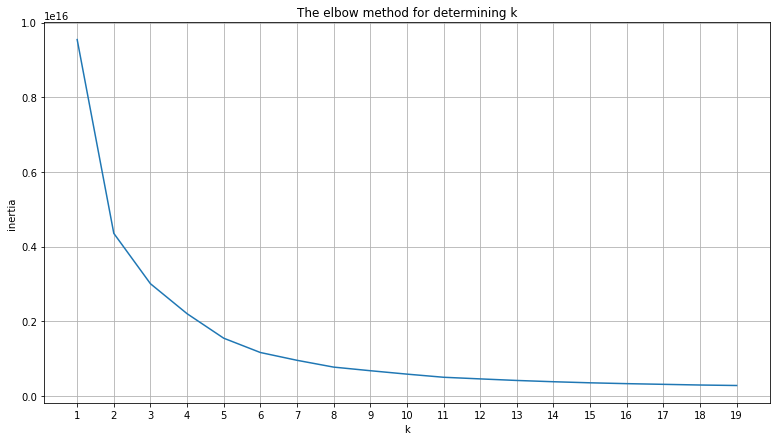

In [14]:
# creating the list of the features to cluster on
loc_features = ['latitude', 'longitude', 'region_id_zip', 'fips']

# lets plot the k and inertia
get_k_val_from_elbow(train_scaled, features = loc_features)



In [20]:
# lets keep k as 4

# creating the object
kmeans1 = KMeans(n_clusters = 4, max_iter = 500)

# fitting the object
kmeans1.fit(train_scaled[loc_features])

#predicting using the kmeans object
y_kmeans1 = kmeans1.predict(train_scaled[loc_features])
y_kmeans1 

array([2, 0, 2, ..., 3, 2, 1], dtype=int32)

array([[ 3.43325555e+07, -1.18392684e+08,  9.66088361e+04,
         6.03794101e+03],
       [ 3.37599896e+07, -1.17822792e+08,  9.68711648e+04,
         6.05543334e+03],
       [ 3.39725449e+07, -1.18230608e+08,  9.62963514e+04,
         6.03730690e+03],
       [ 3.42312748e+07, -1.18981171e+08,  9.68650826e+04,
         6.10640896e+03]])

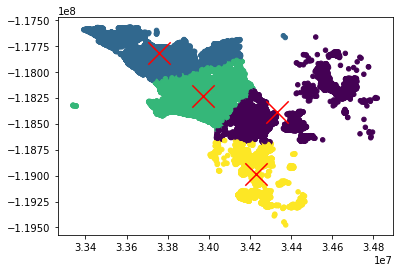

In [21]:
# ploting the centroids
plt.scatter(train[loc_features].iloc[:, 0], train[loc_features].iloc[:, 1], c=y_kmeans1, s=20, cmap='viridis')
centers = kmeans1.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=500, alpha=1, marker = 'x')
centers

In [22]:
# Adding our prediction to the DataFrame
train_scaled['loc_cluster'] = y_kmeans1

In [23]:
train_scaled.head()

,parcel_id,bathroom_count,bedroom_count,home_size_square_feet,fips,latitude,longitude,lot_size_square_feet,raw_census_tract_and_block,region_id_city,...,structure_tax_value_price,tax_value_dollar_count,assessment_year,land_tax_value_price,tax_amount,census_tract_and_block,log_error,transaction_date,county,loc_cluster
13527,11770180,0.000,0.125,0.077158,6037,34012117.0,-118247150.0,0.000875,6.037228e+07,12447,...,0.011004,0.012657,2016,0.009779,0.015755,6.037228e+13,0.555870,2017-03-01,Los Angeles,2
52447,10884378,0.250,0.250,0.159363,6037,34203300.0,-118430000.0,0.001015,6.037127e+07,12447,...,0.056571,0.071437,2016,0.048833,0.071433,6.037127e+13,0.563501,2017-06-30,Los Angeles,0
2559,11749839,0.000,0.500,0.348738,6037,34048146.0,-118311705.0,0.001758,6.037213e+07,12447,...,0.014614,0.013982,2016,0.008776,0.018477,6.037213e+13,0.575048,2017-01-12,Los Angeles,2
33056,10906993,0.125,0.000,0.120983,6037,34151000.0,-118406000.0,0.002714,6.037143e+07,12447,...,0.051514,0.092773,2016,0.078750,0.090104,6.037143e+13,0.564752,2017-05-04,Los Angeles,0
63509,10903027,0.250,0.250,0.223506,6037,34160988.0,-118412064.0,0.000684,6.037125e+07,12447,...,0.064924,0.061172,2016,0.030123,0.061971,6.037125e+13,0.573610,2017-08-03,Los Angeles,0


### Creating clusters based on house features 

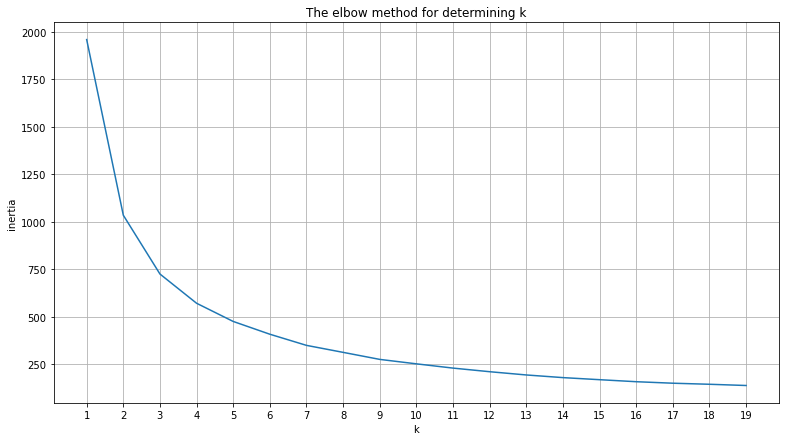

In [53]:
#  features that will be used are 'bathroom_count', 'bedroom_count','home_size_square_feet', 'lot_size_square_feet'

home_features = ['bathroom_count', 'bedroom_count', 'home_size_square_feet', 'lot_size_square_feet']

# plotting k and inertia
get_k_val_from_elbow(train_scaled, features = home_features)

In [54]:
# lets keep k as 5

# creating the object
kmeans2 = KMeans(n_clusters = 5, max_iter = 500)

# fitting the object
kmeans2.fit(train_scaled[home_features])

#predicting using the kmeans object
y_kmeans2 = kmeans2.predict(train_scaled[home_features])
y_kmeans2

array([2, 3, 1, ..., 2, 3, 1], dtype=int32)

array([[0.10380818, 0.27742652, 0.14444412, 0.00222222],
       [0.23884372, 0.39784012, 0.28225346, 0.00222148],
       [0.06622453, 0.10271295, 0.09313658, 0.00617482],
       [0.2317262 , 0.21870699, 0.19766858, 0.00547779],
       [0.44752577, 0.45876289, 0.50558547, 0.0031278 ]])

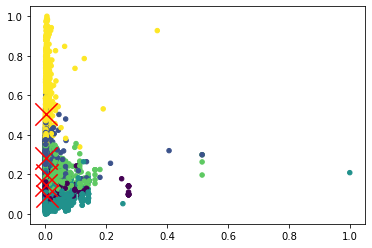

In [55]:
# ploting the centroids 
plt.scatter(train_scaled[home_features].iloc[:, 3], train_scaled[home_features].iloc[:, 2], c=y_kmeans2, s=20, cmap='viridis')
centers = kmeans2.cluster_centers_
plt.scatter(centers[:, 3], centers[:, 2], c='red', s=500, alpha=1, marker = 'x')
centers

In [56]:
# Appending cluster into the DataFrame
train_scaled['home_features_cluster'] = y_kmeans2

### Parameters for Tax Clusters

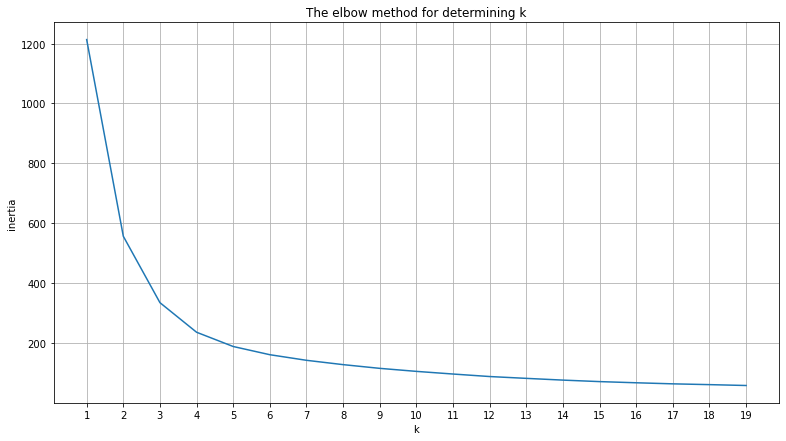

In [57]:

tax_features = ['structure_tax_value_price', 'tax_value_dollar_count', 'land_tax_value_price', 'tax_amount']

get_k_val_from_elbow(train_scaled, features = tax_features)

In [59]:
# lets keep k as 5

# creating the object
kmeans3 = KMeans(n_clusters = 5, max_iter = 500)

# fitting the object
kmeans3.fit(train_scaled[tax_features])

#predicting using the kmeans object
y_kmeans3 = kmeans3.predict(train_scaled[tax_features])
y_kmeans3

array([0, 3, 0, ..., 3, 1, 3], dtype=int32)

array([[0.03221314, 0.03496669, 0.02174803, 0.03848679],
       [0.10591471, 0.17526754, 0.14051931, 0.16799946],
       [0.34209704, 0.63835167, 0.53770278, 0.5931962 ],
       [0.05865576, 0.09144775, 0.0719143 , 0.09011602],
       [0.1995935 , 0.33796147, 0.27226062, 0.31876709]])

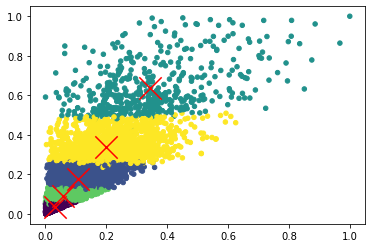

In [60]:
# lets plot the centroids

plt.scatter(train_scaled[tax_features].iloc[:, 0], train_scaled[tax_features].iloc[:, 1], c=y_kmeans3, s=20, cmap='viridis')
centers = kmeans3.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=500, alpha=1, marker = 'x')
centers

In [61]:
# Appending the clusters into DataFrame
train_scaled['tax_features_cluster'] = y_kmeans3